#### variances

**Example - variance to indicate outlier**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the California Housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

In [4]:
# Calculate variances of each column
variances = housing.var(numeric_only=True)

In [6]:
# Suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
variances

longitude                      4.01
latitude                       4.56
housing_median_age           158.40
total_rooms              4759445.11
total_bedrooms            177565.38
population               1282470.46
households                146176.04
median_income                  3.61
median_house_value   13316148163.04
dtype: float64

In [8]:
# Create a DataFrame to store column names and their variances
variance_df = pd.DataFrame({'Column': variances.index, 
                            'Variance': variances.values})
variance_df

,Column,Variance
0,longitude,4.01
1,latitude,4.56
2,housing_median_age,158.40
3,total_rooms,4759445.11
4,total_bedrooms,177565.38
5,population,1282470.46
6,households,146176.04
7,median_income,3.61
8,median_house_value,13316148163.04


In [9]:
# Identify columns with high variances (you can adjust the threshold)
high_variance_columns = variance_df[variance_df['Variance'] > 10.0]

In [10]:
high_variance_columns

,Column,Variance
2,housing_median_age,158.40
3,total_rooms,4759445.11
4,total_bedrooms,177565.38
5,population,1282470.46
6,households,146176.04
8,median_house_value,13316148163.04


Variance cannot alone be indicator of outlier values. data distribution and Kurtosis is important

In [11]:
# Select the first column with high variance
selected_column = high_variance_columns.iloc[3]['Column']

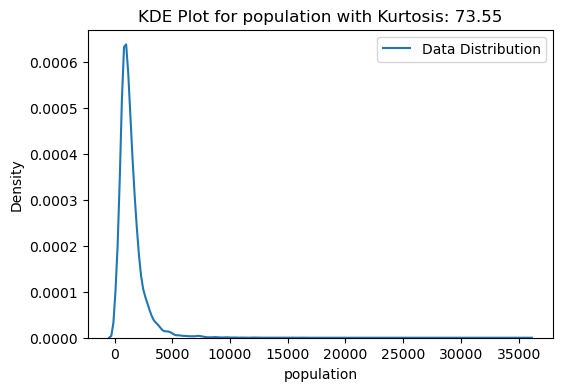

In [14]:
# Plot KDE plot with kurtosis
plt.figure(figsize=(6, 4))
sns.kdeplot(housing[selected_column], label='Data Distribution')
plt.xlabel(selected_column)
plt.ylabel('Density')
plt.title(f'KDE Plot for {selected_column} with Kurtosis: {housing[selected_column].kurtosis():.2f}')
plt.legend()

# print("High Variance Columns:\n", high_variance_columns)
# print("\nSelected Column:", selected_column)

**Mesokurtic** (Kurtosis ≈ 3 for a sample, ≈ 0 if population):

The distribution has a similar kurtosis to the normal distribution.
It means the extreme values of the distribution are similar to that of a normal distribution.

**Leptokurtic** (Kurtosis > 3 for a sample, > 0 if population):

The distribution has heavier or fatter tails than a normal distribution.
It indicates a higher likelihood of outliers or extreme values.

**Platykurtic** (Kurtosis < 3 for a sample, < 0 if population):

The distribution has lighter tails than a normal distribution.
It indicates a lower likelihood of outliers.

In [16]:
high_variance_columns.shape

(6, 2)

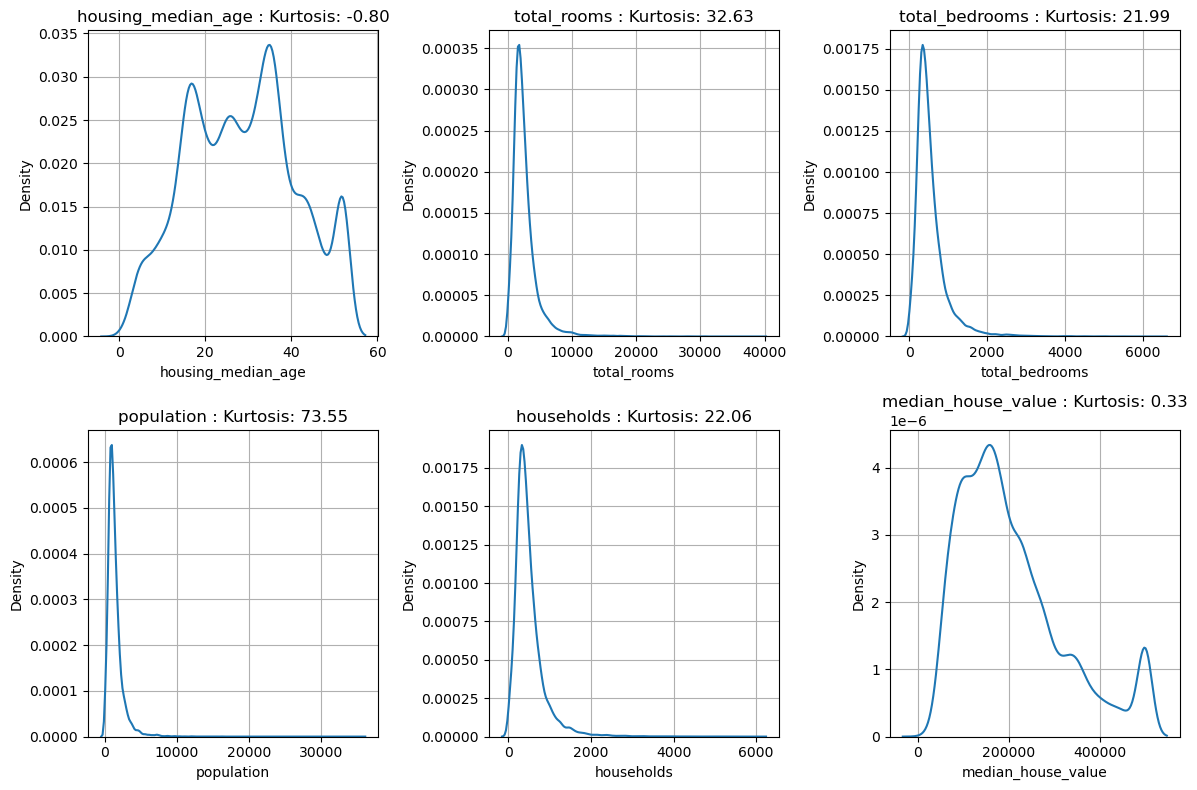

In [21]:
# Setting the size for our plots
plt.figure(figsize=(12, 8))

i =0 
for idx, row in high_variance_columns.iterrows():
    selected_column = row.Column
    
    # Looping through the data and plotting
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, index starting from 1
    sns.kdeplot(housing[selected_column])
    plt.xlabel(selected_column)
    plt.ylabel('Density')
    plt.title(f'{selected_column} : Kurtosis: {housing[selected_column].kurtosis():.2f}')
    plt.grid()
    i+=1
    
# Adjust the layout
plt.tight_layout()